In [7]:
import numpy as np
import itertools
import pandas as pd
import os 

dims = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,5, 5)).astype(int)])[:]

integrator_types = ['velocity_verlet'
                    , 'mclachlan', 
                    'omelyan'
                    ]

samplers = [[f"adjusted_microcanonical_{integrator_type}",
            
                f"unadjusted_microcanonical__{integrator_type}"
                ] for integrator_type in integrator_types]

samplers = [
    x
    for xs in samplers
    for x in xs
]

models = [f"Gaussian_{dim}" for dim in dims]



df = pd.concat([pd.read_csv(f"{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)
df["dim"] = df["Model"].str.extract(r"(\d+)").astype(int)

df = df[df["max"] == False]
df = df[df["statistic"] == 'x2']
df['Integrator'] = df['Sampler'].apply(lambda x: x.split('_')[-1])
df['Sampler'] = df['Sampler'].apply(lambda x: x.split('_')[0])
df['ESS'] = 100/df["num_grads_to_low_error"]
# df=df[df["Sampler"]=='adjusted_microcanonical_velocity_verlet']



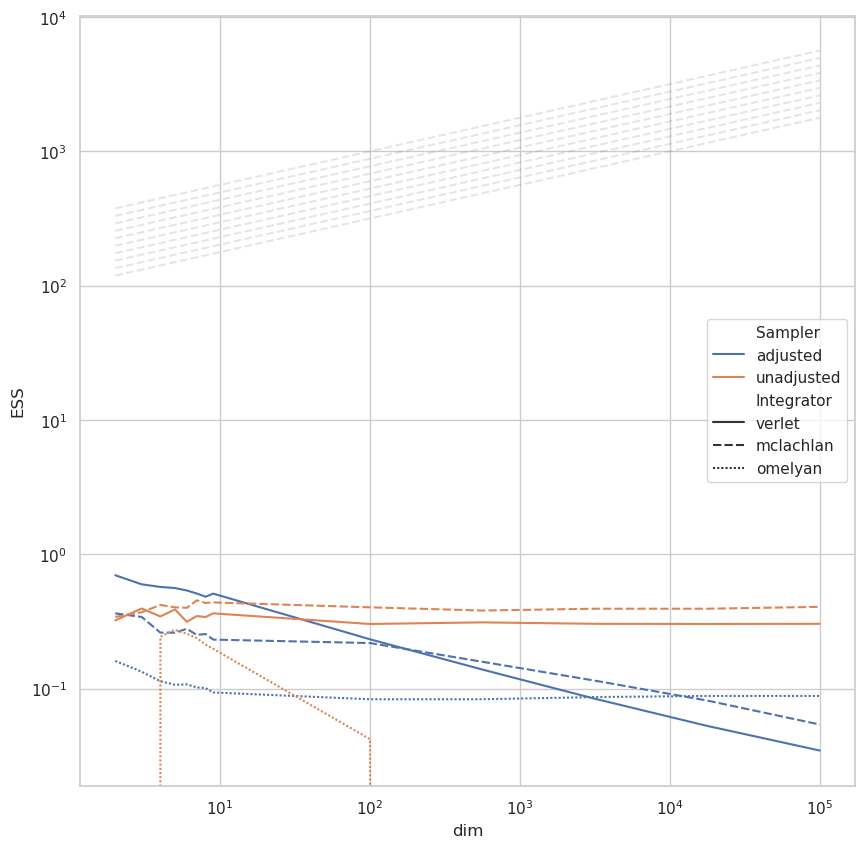

In [15]:
# plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

sns.lineplot(data=df, x='dim', y='ESS', hue='Sampler', style='Integrator', ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

## y = x^{1/4} lines
x = np.linspace(2, 100000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(2,2.5,10):
    y = x**(1/4) * a
    ax.plot(x, y, linestyle='--', color='grey', alpha=0.2)
# 1/8
# y = x**(1/8)
# ax.plot(x, y, label='$x^{1/8}$', linestyle='--', color='grey', alpha=0.2)
plt.legend()